<a href="https://colab.research.google.com/github/Euan-J-Austin/Analytics_and_Intelligence/blob/main/GaussianMixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Clustering, find patterns in data and group by those patterns

# Clustering

A part of unsupervised learning techniques, where there's no dependent variable

Clustering by characteristic into smaller groups makes analysis easier

# Gaussian Mixture Model

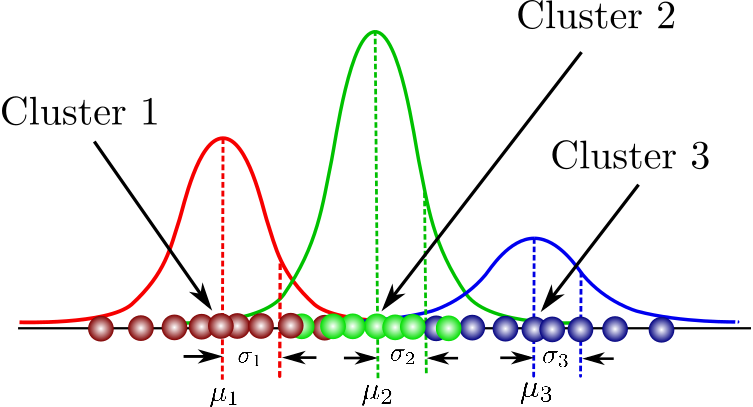

Gaussian mixture model is a probabilistic model for clustering, clustering by p(belonging)

Gaussian is probabilistic, meaning belonging to a cluster means belonging at 60%, 80% etc. as opposed to a deterministic model like K-means where variables belong 100%

Better for evaluatign edge cases

# Credit cards

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [ ]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [ ]:
  df = pd.get_dummies(df, drop_first = True)
  df.head(3)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,0,37.66667,4.52,0.033270,124.983300,3,54,1,12,1,1,0
1,0,33.25000,2.42,0.005217,9.854167,3,34,1,13,1,0,0
2,0,33.66667,4.50,0.004156,15.000000,4,58,1,5,1,1,0


In [ ]:
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967,0.775588,0.440485,0.068992
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812,0.417353,0.496634,0.253536
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000,1.000000,0.000000,0.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000,1.000000,1.000000,0.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000,1.000000,1.000000,1.000000


# Outliers

Should drop some of these? see titanic csv for how to determine ... is there a method for finding low probability density areas with Gaussian mixture

## Optimal no. clusters?

Akaike's Information Criterion (AIC) and Bayesian Information Criterion (BIC)

used to select clusters and best model

trade off b/w simplicity and goodness of fit ... lower is better bc overfitting risk

will use both criterion

# Gaussian Mixture Model




In [ ]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n_components = n,
                          random_state = 1502).fit(df) for n in n_components]


Text(0.5, 0, 'Number of Components')

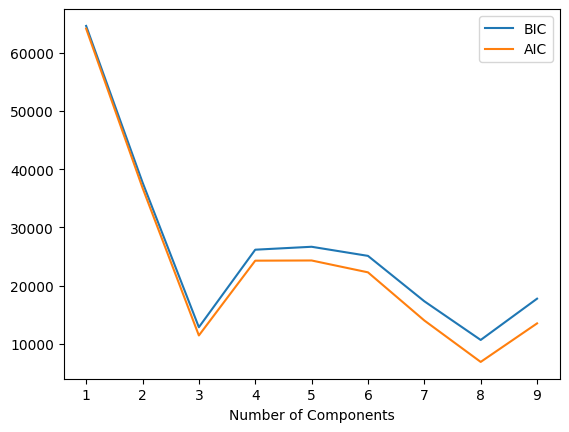

In [ ]:
plt.plot(n_components,
         [m.bic(df) for m in models],
          label = 'BIC')
plt.plot(n_components,
         [m.aic(df) for m in models],
          label = 'AIC')
plt.legend()
plt.xlabel('Number of Components')

In [ ]:
model = GaussianMixture(n_components = 3,
                        random_state = 1502).fit(df)

#Interpretation

In [ ]:
#Predict the cluster for each customer
cluster = pd.Series(model.predict(df))
cluster

0       2
1       2
2       2
3       2
4       2
       ..
1314    2
1315    0
1316    2
1317    1
1318    2
Length: 1319, dtype: int64

In [ ]:
#Create Cluster variable
df['cluster'] = cluster
df.head(2)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes,cluster
0,0,37.66667,4.52,0.033270,124.983300,3,54,1,12,1,1,0,2
1,0,33.25000,2.42,0.005217,9.854167,3,34,1,13,1,0,0,2


In [ ]:
#People per cluster?

df.cluster.value_counts()

2    720
1    303
0    296
Name: cluster, dtype: int64

In [ ]:
#Interpretation

interpretation = pd.DataFrame(model.means_,
             columns = df.iloc[:,:-1].columns)

interpretation = interpretation.round(2)

interpretation

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,1.59,33.20,3.07,0.00,0.00,1.08,55.3,0.74,6.05,0.0,0.30,0.09
1,0.44,34.91,3.55,0.09,242.61,1.01,68.0,0.46,7.38,1.0,0.50,0.21
2,0.00,32.50,3.41,0.09,236.92,0.95,49.9,1.00,7.22,1.0,0.47,0.00


In [ ]:
#Names
#Cluster 0: Non-Credit Users (30pc own houses need good credit for mortgage)
#Cluster 1: Successful Entrepreneurs(? based on self_emp of 21pc?? )
#Cluster 2: Young Employees

#I don't think these clusters are that useful
